# Supervised Machine Learning Regression

In [42]:
import pandas as pd
import numpy as np

In [147]:
# Dataset Source: https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information?resource=download
energy_dataset = pd.read_csv("Smart_home_dataset.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [148]:
energy_dataset.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [149]:
energy_dataset.shape

(503911, 32)

In [150]:
energy_dataset.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [151]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [152]:
energy_dataset.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [153]:
energy_dataset.dropna(inplace = True)

In [154]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [155]:
import seaborn as sns

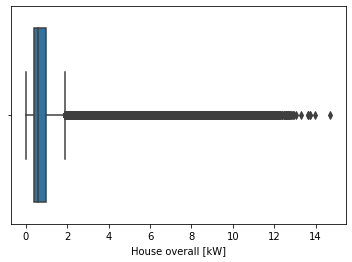

In [156]:
ax = sns.boxplot(x="House overall [kW]", data = energy_dataset)

In [157]:
energy_dataset = energy_dataset[energy_dataset["House overall [kW]"]<=13]

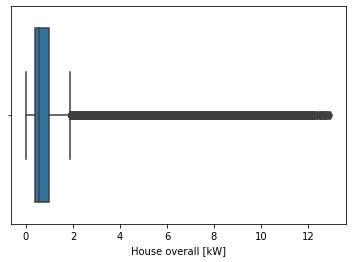

In [158]:
ax = sns.boxplot(x="House overall [kW]", data = energy_dataset)

In [159]:
features = energy_dataset.corr()['House overall [kW]'].sort_values()

In [160]:
energy_dataset.corr()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
use [kW],1.000000,-0.131722,1.000000,0.196399,0.314612,0.489385,0.147720,0.149215,0.124529,0.026563,...,0.010221,0.011355,-0.002403,0.005397,0.010752,-0.003724,0.011294,0.024110,0.015825,-0.003802
gen [kW],-0.131722,1.000000,-0.131722,0.038211,-0.020448,-0.107675,-0.085423,-0.002856,0.062434,0.036328,...,0.090989,0.007615,-0.017659,0.093798,-0.000223,-0.056560,-0.007886,0.030481,0.089672,0.041213
House overall [kW],1.000000,-0.131722,1.000000,0.196399,0.314612,0.489385,0.147720,0.149215,0.124529,0.026563,...,0.010221,0.011355,-0.002403,0.005397,0.010752,-0.003724,0.011294,0.024110,0.015825,-0.003802
Dishwasher [kW],0.196399,0.038211,0.196399,1.000000,0.001998,-0.008383,0.065533,0.034014,-0.004641,-0.008957,...,-0.015723,-0.001883,-0.008058,-0.014555,0.000222,-0.001666,0.004005,0.006279,-0.016111,0.008201
Furnace 1 [kW],0.314612,-0.020448,0.314612,0.001998,1.000000,0.240336,-0.019691,-0.042565,-0.096097,-0.022802,...,-0.301742,-0.049910,-0.034698,-0.308702,-0.000300,0.092176,0.025646,0.009023,-0.301192,0.000250
Furnace 2 [kW],0.489385,-0.107675,0.489385,-0.008383,0.240336,1.000000,-0.008548,-0.032628,-0.052312,0.002969,...,-0.235635,-0.037460,-0.013069,-0.242884,-0.001531,0.072645,0.031943,0.022342,-0.233492,0.007782
Home office [kW],0.147720,-0.085423,0.147720,0.065533,-0.019691,-0.008548,1.000000,0.035015,0.003897,-0.013537,...,0.011910,-0.006004,0.020635,0.010858,0.027090,-0.017901,0.012426,-0.029886,0.007597,-0.032856
Fridge [kW],0.149215,-0.002856,0.149215,0.034014,-0.042565,-0.032628,0.035015,1.000000,0.076177,-0.002380,...,0.107455,0.030734,0.009038,0.107053,-0.000518,-0.024874,-0.008578,0.014188,0.115153,0.004753
Wine cellar [kW],0.124529,0.062434,0.124529,-0.004641,-0.096097,-0.052312,0.003897,0.076177,1.000000,0.004394,...,0.289163,0.055538,0.030090,0.288878,0.018500,-0.052865,-0.025950,0.016610,0.298202,0.006577
Garage door [kW],0.026563,0.036328,0.026563,-0.008957,-0.022802,0.002969,-0.013537,-0.002380,0.004394,1.000000,...,0.013511,-0.007399,0.002263,0.013578,-0.000276,0.000419,0.012328,-0.006944,0.008350,-0.006641


<AxesSubplot:>

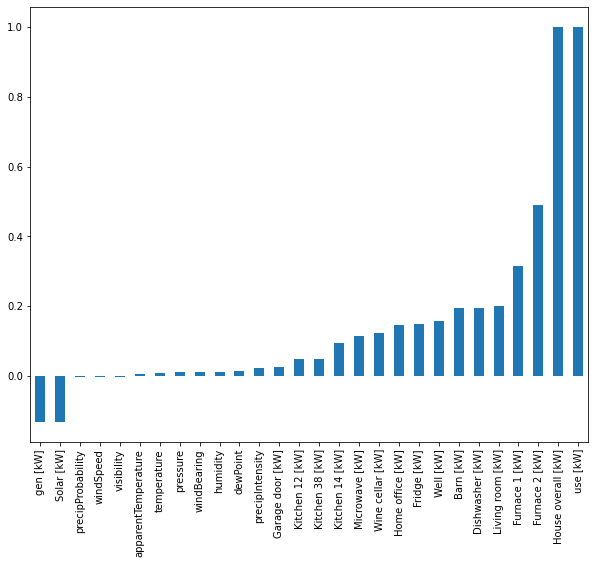

In [161]:
features.plot(kind='bar',figsize=(10,8))

In [162]:
#Generate X and y
app_features = ['Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Barn [kW]', 'Well [kW]','Living room [kW]','Microwave [kW]', 'Kitchen 14 [kW]',
       'Kitchen 12 [kW]','Kitchen 38 [kW]','gen [kW]','Solar [kW]']
X = energy_dataset[app_features]
y = energy_dataset['House overall [kW]']

In [163]:
X.head()

,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Barn [kW],Well [kW],Living room [kW],Microwave [kW],Kitchen 14 [kW],Kitchen 12 [kW],Kitchen 38 [kW],gen [kW],Solar [kW]
0,0.000033,0.020700,0.061917,0.442633,0.124150,0.031350,0.001017,0.001517,0.004067,0.000150,0.000417,0.000000,0.003483,0.003483
1,0.000000,0.020717,0.063817,0.444067,0.124000,0.031500,0.001017,0.001650,0.004067,0.000150,0.000417,0.000000,0.003467,0.003467
2,0.000017,0.020700,0.062317,0.446067,0.123533,0.031517,0.001000,0.001650,0.004067,0.000167,0.000433,0.000017,0.003467,0.003467
3,0.000017,0.106900,0.068517,0.446583,0.123133,0.031500,0.001017,0.001617,0.004067,0.000217,0.000433,0.000000,0.003483,0.003483
4,0.000133,0.236933,0.063983,0.446533,0.122850,0.031500,0.001017,0.001583,0.004067,0.000333,0.000450,0.000000,0.003467,0.003467


In [164]:
y.head()

0    0.932833
1    0.934333
2    0.931817
3    1.022050
4    1.139400
Name: House overall [kW], dtype: float64

In [165]:
#polynomial regression to extend the model
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2,include_bias=True)
# Create the features and fit the model
X_poly = pf.fit_transform(X)

In [166]:
X_poly

array([[1.00000000e+00, 3.33000000e-05, 2.07000000e-02, ...,
        1.21336088e-05, 1.21336088e-05, 1.21336088e-05],
       [1.00000000e+00, 0.00000000e+00, 2.07166670e-02, ...,
        1.20177801e-05, 1.20177801e-05, 1.20177801e-05],
       [1.00000000e+00, 1.67000000e-05, 2.07000000e-02, ...,
        1.20177801e-05, 1.20177801e-05, 1.20177801e-05],
       ...,
       [1.00000000e+00, 3.33000000e-05, 4.22383333e-01, ...,
        1.03469466e-05, 1.03469466e-05, 1.03469466e-05],
       [1.00000000e+00, 5.00000000e-05, 4.95666667e-01, ...,
        1.03469466e-05, 1.03469466e-05, 1.03469466e-05],
       [1.00000000e+00, 5.00000000e-05, 4.94700000e-01, ...,
        1.04544423e-05, 1.04544423e-05, 1.04544423e-05]])

In [167]:
#Splitting train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    test_size=0.3, random_state=42)

In [168]:
#Scaling usnig StandardScaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [169]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)


In [170]:
# Calculating r2 score
from sklearn.metrics import r2_score

print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))
print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

r2 score for Linear Regression: 0.3032518396506876
Magnitude of Linear Regression coefficients: 107467260239.76361
Number of coeffients not equal to 0 for Linear Regression: 120


In [174]:
# Lasso regression
from sklearn.linear_model import Lasso
las01 = Lasso(alpha = 0.01, max_iter=100000)

# Fitting model to training set
las01.fit(X_train_s, y_train)

# predicting on test set
y_pred_las01 = las01.predict(X_test_s)
print("r2 score for Lasso Regression:", r2_score(y_pred_las01, y_test))
print('Magnitude of Lasso Regression coefficients:', abs(las01.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso Regression:', (las01.coef_!=0).sum())

r2 score for Lasso Regression: 0.1356309503665677
Magnitude of Lasso Regression coefficients: 2.7702535912862603
Number of coeffients not equal to 0 for Lasso Regression: 36


In [175]:
# Lasso regression
from sklearn.linear_model import Lasso
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# predicting on test set
y_pred_las001 = las001.predict(X_test_s)
print("r2 score for Lasso Regression:", r2_score(y_pred_las001, y_test))
print('Magnitude of Lasso Regression coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso Regression:', (las001.coef_!=0).sum())

r2 score for Lasso Regression: 0.28684240610827316
Magnitude of Lasso Regression coefficients: 6.426406228452473
Number of coeffients not equal to 0 for Lasso Regression: 96


In [173]:
#Ridge regression
from sklearn.linear_model import Ridge
r = Ridge(alpha = 0.01)
# Fitting model to training set
r.fit(X_train_s, y_train)
# predicting on test set
y_pred_r = r.predict(X_test_s)

print("r2 score for Ridge Regression:", r2_score(y_pred_r, y_test))
print('Magnitude of Ridge Regression coefficients:', abs(r.coef_).sum())
print('Number of coeffients not equal to 0 for Ridge Regression:', (r.coef_!=0).sum())

r2 score for Ridge Regression: 0.30325600207175707
Magnitude of Ridge Regression coefficients: 7.601464995674554
Number of coeffients not equal to 0 for Ridge Regression: 119
